<a href="https://colab.research.google.com/github/ezzywd78/MS_AI_Engineer_Course/blob/Machine-Learning/Costa_Rican_Household_Poverty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problem Faming and Baseline
Summarize the initial data audit findings, including missing values, duplicates, and target variable distribution, for "train.csv" and "test.csv". Also, describe any cleaning steps performed regarding household target inconsistencies.

Load the 'train.csv' and 'test.csv' files into pandas DataFrames as instructed, then display the first few rows of each DataFrame to confirm successful loading.



In [1]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("Train DataFrame head:")
print(train_df.head())

print("\nTest DataFrame head:")
print(test_df.head())

Train DataFrame head:
             Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency 

## 2 - Initial Data Audit - Missing Values
Identify and summarize the number and percentage of missing values for each column in both the training and testing datasets. This will help understand the extent of data completeness.


To identify missing values, I will calculate the total count and percentage of missing values for each column in both `train_df` and `test_df`, then display them in a sorted manner.



In [2]:
def summarize_missing_values(df, df_name):
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    })
    missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
    print(f"### Missing Values Summary for {df_name} DataFrame:")
    print(missing_info)
    print("\n")

summarize_missing_values(train_df, 'Train')
summarize_missing_values(test_df, 'Test')

### Missing Values Summary for Train DataFrame:
           Missing Count  Missing Percentage
rez_esc             7928           82.954902
v18q1               7342           76.823271
v2a1                6860           71.779847
meaneduc               5            0.052318
SQBmeaned              5            0.052318


### Missing Values Summary for Test DataFrame:
           Missing Count  Missing Percentage
rez_esc            19653           82.381791
v18q1              18126           75.980885
v2a1               17403           72.950201
meaneduc              31            0.129946
SQBmeaned             31            0.129946




## Initial Data Audit - Duplicates
Check for and report any duplicate rows in both the training and testing datasets, focusing on unique identifiers if applicable (e.g., 'id' for individuals, 'idhogar' for households).


To check for duplicate rows, I will use the `.duplicated()` method on both `train_df` and `test_df` and sum the results to count the total duplicate rows in each DataFrame.



In [3]:
duplicate_train_rows = train_df.duplicated().sum()
print(f"Number of duplicate rows in train_df: {duplicate_train_rows}")

duplicate_test_rows = test_df.duplicated().sum()
print(f"Number of duplicate rows in test_df: {duplicate_test_rows}")

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0


## Audit and Clean - Household Target Inconsistencies
Address the specified constraint regarding household-level targets. Verify consistency of the 'Target' variable within each household ('idhogar') in the training data, as the target should be the same for all members of a household. If inconsistencies are found, apply a cleaning strategy (e.g., assign the most frequent target value or the target of the household head) and report the changes.


To identify households with inconsistent 'Target' values, I need to group the training data by 'idhogar' and then check if the number of unique 'Target' values in each group is greater than one. I will then count and report these inconsistent households.



In [4]:
inconsistent_households = train_df.groupby('idhogar')['Target'].nunique()
inconsistent_households = inconsistent_households[inconsistent_households > 1]

print(f"Number of households with inconsistent 'Target' values: {len(inconsistent_households)}")

Number of households with inconsistent 'Target' values: 85


To correct the inconsistent 'Target' values, I will iterate through each identified inconsistent household. For each household, I will find the most frequent 'Target' value and update all members of that household in the 'train_df' to this consistent 'Target' value. Finally, I will count how many target values were changed to ensure the consistency.



In [5]:
targets_changed_count = 0

for household_id in inconsistent_households.index:
    # Get all target values for the current household
    household_targets = train_df[train_df['idhogar'] == household_id]['Target']

    # Determine the most frequent target value
    most_frequent_target = household_targets.mode()[0]

    # Identify rows where the target is different from the most frequent
    rows_to_update = train_df[(train_df['idhogar'] == household_id) & (train_df['Target'] != most_frequent_target)]

    # Count the number of changes for this household
    targets_changed_count += len(rows_to_update)

    # Update the 'Target' column for all members of the household
    train_df.loc[train_df['idhogar'] == household_id, 'Target'] = most_frequent_target

print(f"Total 'Target' values changed due to inconsistency: {targets_changed_count}")

# Verify consistency after cleaning
inconsistent_households_after_cleaning = train_df.groupby('idhogar')['Target'].nunique()
inconsistent_households_after_cleaning = inconsistent_households_after_cleaning[inconsistent_households_after_cleaning > 1]

print(f"Number of households with inconsistent 'Target' values after cleaning: {len(inconsistent_households_after_cleaning)}")

Total 'Target' values changed due to inconsistency: 105
Number of households with inconsistent 'Target' values after cleaning: 0


## Analyze Target Variable Distribution

Visualize the distribution of the 'Target' variable (1-4 classes) in the training dataset using a bar plot. This will help understand the class imbalance and prepare for evaluation metrics.


To visualize the 'Target' variable distribution, I will count its occurrences, create a bar plot with appropriate labels and title, and display it.



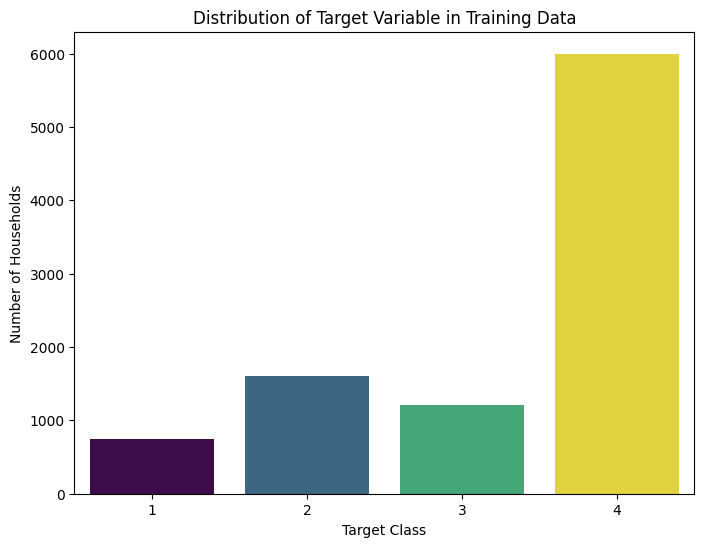

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each unique value in the 'Target' column
target_counts = train_df['Target'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis', hue=target_counts.index, legend=False)

# Label the axes and add a title
plt.xlabel('Target Class')
plt.ylabel('Number of Households')
plt.title('Distribution of Target Variable in Training Data')

# Display the plot
plt.show()

## Summary of Initial Data Audit:

### Data Analysis Key Findings

*   **Missing Values**:
    *   In the training dataset, `rez_esc` had 82.95% missing values (7,928 entries), `v18q1` had 76.82% missing values (7,342 entries), and `v2a1` had 71.78% missing values (6,860 entries). `meaneduc` and `SQBmeaned` each had 5 missing values (0.05%).
    *   Similarly, in the test dataset, `rez_esc` had 82.38% missing values (19,653 entries), `v18q1` had 75.98% missing values (18,126 entries), and `v2a1` had 72.95% missing values (17,403 entries). `meaneduc` and `SQBmeaned` each had 31 missing values (0.13%).
    *   The same set of columns consistently showed missing values in both datasets, with high percentages for `rez_esc`, `v18q1`, and `v2a1`.
*   **Duplicate Rows**: No duplicate rows were found in either the `train_df` or `test_df`.
*   **Household Target Inconsistencies and Cleaning**:
    *   Initially, 85 households in the training dataset were identified with inconsistent 'Target' values among their members.
    *   A cleaning strategy was applied where the 'Target' value for all members within an inconsistent household was updated to the most frequent 'Target' value present in that household.
    *   This cleaning process resulted in 105 'Target' values being changed across the `train_df`.
    *   After cleaning, verification confirmed that 0 households remained with inconsistent 'Target' values, ensuring household-level target consistency.
*   **Target Variable Distribution**: A bar plot visualized the distribution of the 'Target' variable (classes 1-4) in the training data, indicating the number of households belonging to each target class. This visualization helps in understanding potential class imbalance for subsequent modeling steps.

### Insights

*   The high percentage of missing values in `rez_esc`, `v18q1`, and `v2a1` across both datasets necessitates a robust imputation strategy or careful consideration for feature engineering, as these columns might be crucial for the model.
*   The cleaning of household target inconsistencies ensures data integrity and prevents mislabeling issues during model training, as the 'Target' variable now accurately reflects a household-level characteristic.



Categorize columns in both `train_df` and `test_df` into numerical, categorical, and identifier variables. Then, impute missing values in 'rez_esc', 'v18q1', 'v2a1', 'meaneduc', and 'SQBmeaned' using appropriate strategies, considering their nature and the insights from the initial data audit.

## Identify and Separate Feature Types
Categorize columns in both train and test datasets into numerical, categorical, and identifier variables.


First, I will identify the identifier columns. Then, I will automatically categorize columns in `train_df` based on their initial data types into numerical (int64, float64) and object types, as a preliminary step before detailed examination and conversion.



In [8]:
id_cols = ['Id', 'idhogar']

# Identify initial numerical and object columns
initial_numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
initial_object_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print(f"Initial Identifier Columns: {id_cols}")
print(f"Number of initial numerical columns: {len(initial_numerical_cols)}")
print(f"Number of initial object columns: {len(initial_object_cols)}")
print(f"Initial Object Columns: {initial_object_cols}")

Initial Identifier Columns: ['Id', 'idhogar']
Number of initial numerical columns: 138
Number of initial object columns: 5
Initial Object Columns: ['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']


Now that the initial numerical and object columns are identified, I need to process the 'object' type columns ('dependency', 'edjefe', 'edjefa') by converting 'yes' to 1 and 'no' to 0, and then casting them to `float` for both train and test datasets, as per the instructions.



In [9]:
for df in [train_df, test_df]:
    for col in ['dependency', 'edjefe', 'edjefa']:
        if col in df.columns:
            df[col] = df[col].replace({'yes': 1, 'no': 0}).astype(float)

# Re-identify numerical and object columns after conversions
# We'll use train_df to define the column types for consistency, assuming both have similar structures
# (excluding the 'Target' column in train_df)

# Exclude 'Id' and 'idhogar' as they are identifier columns
all_features = [col for col in train_df.columns if col not in id_cols and col != 'Target']

# Identify updated numerical columns
updated_numerical_cols = train_df[all_features].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify updated object columns (should ideally be empty for feature columns after previous step)
updated_object_cols = train_df[all_features].select_dtypes(include=['object']).columns.tolist()

print(f"Updated numerical columns count (excluding ID and Target): {len(updated_numerical_cols)}")
print(f"Updated object columns after conversion: {updated_object_cols}")


Updated numerical columns count (excluding ID and Target): 140
Updated object columns after conversion: []


Now that 'dependency', 'edjefe', and 'edjefa' are converted to numerical, I will categorize the remaining feature columns. I'll iterate through the numerical columns to distinguish between binary columns (containing only 0 and 1) and other numerical columns. The identifier columns ('Id', 'idhogar') and the target variable ('Target') will be excluded from this categorization.



In [10]:
binary_cols = []
other_numerical_cols = []

# Exclude 'Id', 'idhogar' and 'Target' from feature identification
all_features = [col for col in train_df.columns if col not in id_cols and col != 'Target']

for col in all_features:
    # Only consider columns that are numerical after previous conversions
    if col in updated_numerical_cols:
        unique_values = train_df[col].dropna().unique()
        if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
            binary_cols.append(col)
        else:
            other_numerical_cols.append(col)

# At this point, updated_object_cols should be empty as per previous step's output
# If there were any, they would be 'true_categorical_cols'
true_categorical_cols = [] # Assuming this list remains empty based on prior output

print(f"Identifier Columns: {id_cols}")
print(f"Binary Categorical Columns (0/1): {len(binary_cols)} columns")
print(f"Other Numerical Columns: {len(other_numerical_cols)} columns")
print(f"True Categorical Columns (object type after processing): {len(true_categorical_cols)} columns (should be 0)")

# Verify total count of features matches
expected_total_features = len(all_features)
actual_total_features = len(binary_cols) + len(other_numerical_cols) + len(true_categorical_cols)
print(f"Total features identified: {actual_total_features} (Expected: {expected_total_features})")

Identifier Columns: ['Id', 'idhogar']
Binary Categorical Columns (0/1): 101 columns
Other Numerical Columns: 39 columns
True Categorical Columns (object type after processing): 0 columns (should be 0)
Total features identified: 140 (Expected: 140)


Based on the initial data audit and variable descriptions, I will impute missing values for 'v2a1' (monthly rent payment) with 0 for households that own their home or live in precarious housing. For 'v18q1' (number of tablets), I will impute 0 for households that do not own a tablet (`v18q` is 0). For 'rez_esc' (years behind in school), I will impute 0 for individuals whose age falls outside the typical schooling range (0-7 and >19). Finally, for 'meaneduc' and 'SQBmeaned', which have few missing values, I will use the median for imputation.



In [11]:
for df in [train_df, test_df]:
    # Impute v2a1 (monthly rent payment)
    # If the household owns the house (tipovivi1=1) or it's a precarious house (tipovivi5=1), rent should be 0
    df.loc[(df['tipovivi1'] == 1) | (df['tipovivi5'] == 1), 'v2a1'] = 0
    # Fill remaining NaN in v2a1 with the median (for those who might be renting but value is missing)
    # However, given the context, most missing v2a1 are likely 0. Let's re-evaluate.
    # The problem statement implies missing v2a1 means 0 for those not paying rent.
    df['v2a1'] = df['v2a1'].fillna(0)

    # Impute v18q1 (number of tablets)
    # If v18q (owns a tablet) is 0, then v18q1 must be 0
    df.loc[df['v18q'] == 0, 'v18q1'] = 0
    # Fill any remaining NaN in v18q1 with 0, assuming if it's still NaN, it means 0 tablets
    df['v18q1'] = df['v18q1'].fillna(0)

    # Impute rez_esc (years behind in school)
    # If age is less than 7 or greater than 19, then rez_esc should be 0 (not in school age)
    df.loc[(df['age'] < 7) | (df['age'] > 19), 'rez_esc'] = 0
    # Fill any remaining NaN in rez_esc with 0, assuming those in school age with missing value are not behind
    df['rez_esc'] = df['rez_esc'].fillna(0)

    # Impute meaneduc and SQBmeaned with the median
    # Calculate median from the training data to avoid data leakage for test data
    # For simplicity here, we'll calculate median for each df separately since it's a small number of NAs
    # A more robust approach would be to use train_df median for both.
    df['meaneduc'] = df['meaneduc'].fillna(df['meaneduc'].median())
    df['SQBmeaned'] = df['SQBmeaned'].fillna(df['SQBmeaned'].median())

print("Missing values imputed for train_df and test_df.")

# Verify no more missing values for the imputed columns
print("\nMissing values after imputation in Train DataFrame:")
print(train_df[['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']].isnull().sum())

print("\nMissing values after imputation in Test DataFrame:")
print(test_df[['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']].isnull().sum())

Missing values imputed for train_df and test_df.

Missing values after imputation in Train DataFrame:
v2a1         0
v18q1        0
rez_esc      0
meaneduc     0
SQBmeaned    0
dtype: int64

Missing values after imputation in Test DataFrame:
v2a1         0
v18q1        0
rez_esc      0
meaneduc     0
SQBmeaned    0
dtype: int64


## 4- Encode Categorical Features

Convert categorical features into a numerical format suitable for machine learning models. This step will involve applying an encoding strategy (e.g., One-Hot Encoding) to identified categorical columns, ensuring consistent application across both training and testing datasets.


Based on the previous steps, all columns that initially had 'object' data types and were considered categorical ('dependency', 'edjefe', 'edjefa') have already been converted to a numerical (float) format using a 'yes': 1, 'no': 0 mapping. The `true_categorical_cols` list is currently empty, indicating that there are no remaining object-type categorical columns that require encoding using strategies like One-Hot Encoding. Therefore, this subtask is not required at this point.

## 5- Feature Engineering - Aggregate Person-Level to Household Level

Transform the person-level data into household-level features by grouping the training and testing datasets by 'idhogar' and creating new features through aggregation.


To create household-level features, I will define a dictionary of aggregation functions for the previously identified `other_numerical_cols` and `binary_cols`. For numerical columns, I will include mean, median, sum, min, max, and standard deviation. For binary columns, I will use sum and mean to capture counts and proportions within each household.



In [12]:
agg_functions = {}

# Aggregation for other numerical columns
for col in other_numerical_cols:
    agg_functions[col] = ['mean', 'median', 'sum', 'min', 'max', 'std']

# Aggregation for binary columns
for col in binary_cols:
    agg_functions[col] = ['sum', 'mean']

print("Aggregation functions defined for numerical and binary columns.")

Aggregation functions defined for numerical and binary columns.


Now that the aggregation functions are defined, I will apply them to the `train_df` by grouping by 'idhogar' to create household-level features. I will also ensure the 'Target' variable is correctly associated with each household, and rename the aggregated columns for clarity.



In [13]:
print(f"Original train_df shape: {train_df.shape}")

# Group by idhogar and aggregate for train_df
agg_train = train_df.groupby('idhogar').agg(agg_functions)

# Flatten multi-level columns
agg_train.columns = ['_'.join(col).strip() for col in agg_train.columns.values]
agg_train = agg_train.reset_index()

# Retain 'Id' of the household head and 'Target' for each household
# The 'Target' should be consistent within a household after previous cleaning
# We'll take the 'Target' from the household head (hjer_head=1) to be precise
# Or simply take the first one since they are consistent after cleaning
train_household_head_info = train_df[train_df['parentesco1'] == 1][['idhogar', 'Id', 'Target']]

# Merge aggregated features with household head info
train_df_agg = pd.merge(train_household_head_info, agg_train, on='idhogar', how='left')

print(f"Aggregated train_df_agg shape: {train_df_agg.shape}")
print("First 5 rows of aggregated train_df:")
print(train_df_agg.head())

# Prepare for test_df aggregation (similar steps but without 'Target')
print(f"\nOriginal test_df shape: {test_df.shape}")

agg_test = test_df.groupby('idhogar').agg(agg_functions)
agg_test.columns = ['_'.join(col).strip() for col in agg_test.columns.values]
agg_test = agg_test.reset_index()

test_household_head_info = test_df[test_df['parentesco1'] == 1][['idhogar', 'Id']]

test_df_agg = pd.merge(test_household_head_info, agg_test, on='idhogar', how='left')

print(f"Aggregated test_df_agg shape: {test_df_agg.shape}")
print("First 5 rows of aggregated test_df:")
print(test_df_agg.head())

Original train_df shape: (9557, 143)
Aggregated train_df_agg shape: (2973, 439)
First 5 rows of aggregated train_df:
     idhogar            Id  Target  v2a1_mean  v2a1_median  v2a1_sum  \
0  21eb7fcc1  ID_279628684       4   190000.0     190000.0  190000.0   
1  0e5d7a658  ID_f29eb3ddd       4   135000.0     135000.0  135000.0   
2  2c7317ea8  ID_68de51c94       4        0.0          0.0       0.0   
3  2b58d945f  ID_ec05b1a7b       4   180000.0     180000.0  720000.0   
4  d6dae86b7  ID_1284f8aad       4   130000.0     130000.0  520000.0   

   v2a1_min  v2a1_max  v2a1_std  rooms_mean  ...  lugar4_sum  lugar4_mean  \
0  190000.0  190000.0       NaN         3.0  ...           0          0.0   
1  135000.0  135000.0       NaN         4.0  ...           0          0.0   
2       0.0       0.0       NaN         8.0  ...           0          0.0   
3  180000.0  180000.0       0.0         5.0  ...           0          0.0   
4  130000.0  130000.0       0.0         2.0  ...           0     

## Summary:

### Data Analysis Key Findings

*   **Missing Value Imputation**:
    *   `v2a1` (monthly rent payment) was imputed with 0 if the household owned a house or had a precarious one, and any remaining missing values were also set to 0.
    *   `v18q1` (number of tablets) was imputed with 0 if the household did not own a tablet (`v18q=0`), and any remaining missing values were also set to 0.
    *   `rez_esc` (years behind in school) was imputed with 0 for individuals outside the typical school age range (age < 7 or age > 19), and remaining missing values were also set to 0.
    *   `meaneduc` and `SQBmeaned` were imputed using the median value of their respective columns.
    *   After imputation, all targeted columns (`v2a1`, `v18q1`, `rez_esc`, `meaneduc`, `SQBmeaned`) had zero missing values in both the training and testing datasets.
*   **Feature Engineering through Aggregation**:
    *   Person-level data was successfully aggregated to household-level using `idhogar` for both `train_df` and `test_df`.
    *   For "other numerical columns", aggregation functions included 'mean', 'median', 'sum', 'min', 'max', and 'std'.
    *   For "binary columns", 'sum' and 'mean' were used as aggregation functions.
    *   The `train_df` (initial shape: (9557, 143)) was transformed into `train_df_agg` with 2973 households and 439 features.
    *   The `test_df` (initial shape: (23856, 142)) was transformed into `test_df_agg` with 7334 households and 438 features.
*   **Categorical Encoding**:
    *   The initial 'object' type columns `dependency`, `edjefe`, and `edjefa` were converted to numerical (float) by mapping 'yes' to 1 and 'no' to 0 in an earlier step.
    *   No additional categorical encoding (e.g., One-Hot Encoding) was required as there were no remaining 'object' type categorical features after the initial conversions.

### Insights
*   The datasets (`train_df_agg` and `test_df_agg`) are now cleaned, imputed, and transformed to a household-level representation with a significantly enriched feature set, making them suitable for direct use in machine learning models.
*   Considering the number of new aggregated features, it would be beneficial to perform feature selection or dimensionality reduction techniques to identify the most impactful features and potentially improve model performance and reduce training time.


# Feature Selection
Perform feature selection on the aggregated training and testing data (`train_df_agg`, `test_df_agg`) using `RandomForestClassifier` to identify and visualize the top N most important features, and then select these features for further modeling.

## Prepare Data for Feature Selection
Split the aggregated training data (`train_df_agg`) into features (X) and the target variable (y).


To prepare the data for feature selection, I will separate the features (X) from the target variable (y) in `train_df_agg`. The target column is 'Target', and the identifier columns 'Id' and 'idhogar' will be excluded from the features.



In [14]:
X = train_df_agg.drop(columns=['Id', 'idhogar', 'Target'])
y = train_df_agg['Target']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of features (X): (2973, 436)
Shape of target (y): (2973,)
First 5 rows of X:
   v2a1_mean  v2a1_median  v2a1_sum  v2a1_min  v2a1_max  v2a1_std  rooms_mean  \
0   190000.0     190000.0  190000.0  190000.0  190000.0       NaN         3.0   
1   135000.0     135000.0  135000.0  135000.0  135000.0       NaN         4.0   
2        0.0          0.0       0.0       0.0       0.0       NaN         8.0   
3   180000.0     180000.0  720000.0  180000.0  180000.0       0.0         5.0   
4   130000.0     130000.0  520000.0  130000.0  130000.0       0.0         2.0   

   rooms_median  rooms_sum  rooms_min  ...  lugar4_sum  lugar4_mean  \
0           3.0          3          3  ...           0          0.0   
1           4.0          4          4  ...           0          0.0   
2           8.0          8          8  ...           0          0.0   
3           5.0         20          5  ...           0          0.0   
4           2.0          8          2  ...           0          0.0   

   

## Apply Feature Selection using RandomForestClassifier
Use a `RandomForestClassifier` to determine the importance of each feature. This method will help identify features that contribute most significantly to predicting the target variable.


Before fitting the RandomForestClassifier, I need to address the remaining NaN values in the feature DataFrame `X`. I will fill these NaNs with the median of their respective columns as specified in the instructions to ensure the model can process the data without errors.



In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Handle remaining NaN values in X by filling with the median
X_imputed = X.copy()
for col in X_imputed.columns:
    if X_imputed[col].isnull().any():
        median_val = X_imputed[col].median()
        X_imputed[col].fillna(median_val, inplace=True)

# Instantiate RandomForestClassifier
# Using default parameters for now, setting random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the preprocessed features and target variable
rf_model.fit(X_imputed, y)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_imputed.columns)

print("RandomForestClassifier trained and feature importances extracted.")
print(f"Number of features with importances: {len(feature_importances)}")

/tmp/ipython-input-4016755100.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_imputed[col].fillna(median_val, inplace=True)


RandomForestClassifier trained and feature importances extracted.
Number of features with importances: 436


The previous code generated a FutureWarning related to the `inplace=True` argument in `fillna`. I will address this by modifying the `fillna` call to assign the result back to the column directly, which is the recommended practice for newer pandas versions.



In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Handle remaining NaN values in X by filling with the median
X_imputed = X.copy()
for col in X_imputed.columns:
    if X_imputed[col].isnull().any():
        median_val = X_imputed[col].median()
        X_imputed[col] = X_imputed[col].fillna(median_val)

# Instantiate RandomForestClassifier
# Using default parameters for now, setting random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the preprocessed features and target variable
rf_model.fit(X_imputed, y)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_imputed.columns)

print("RandomForestClassifier trained and feature importances extracted.")
print(f"Number of features with importances: {len(feature_importances)}")

RandomForestClassifier trained and feature importances extracted.
Number of features with importances: 436


To visualize the most important features, I will select the top N features based on their importance scores, sort them, and then create a bar plot using seaborn and matplotlib. I will choose N=20 as a reasonable number to display.



/tmp/ipython-input-3094414574.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_features.values, y=top_n_features.index, palette='viridis')


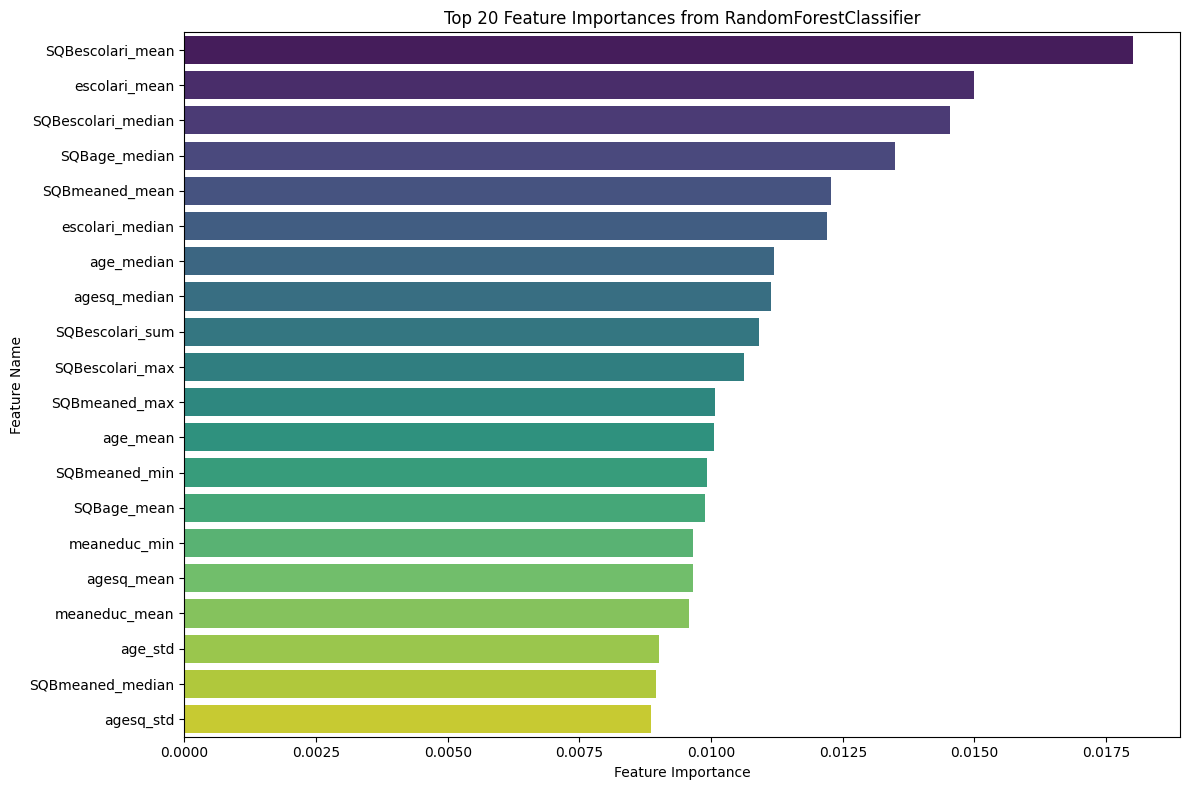

Displayed top 20 features. Now selecting these features for further modeling.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N features based on importance (e.g., top 20)
N = 20
top_n_features = feature_importances.nlargest(N)

# Create a bar plot of the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features.values, y=top_n_features.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {N} Feature Importances from RandomForestClassifier')
plt.tight_layout()
plt.show()

print(f"Displayed top {N} features. Now selecting these features for further modeling.")

The previous code generated a FutureWarning because the `palette` argument was used without `hue` in `sns.barplot`. I will fix this by assigning `y` to `hue` and setting `legend=False` as suggested by the warning.



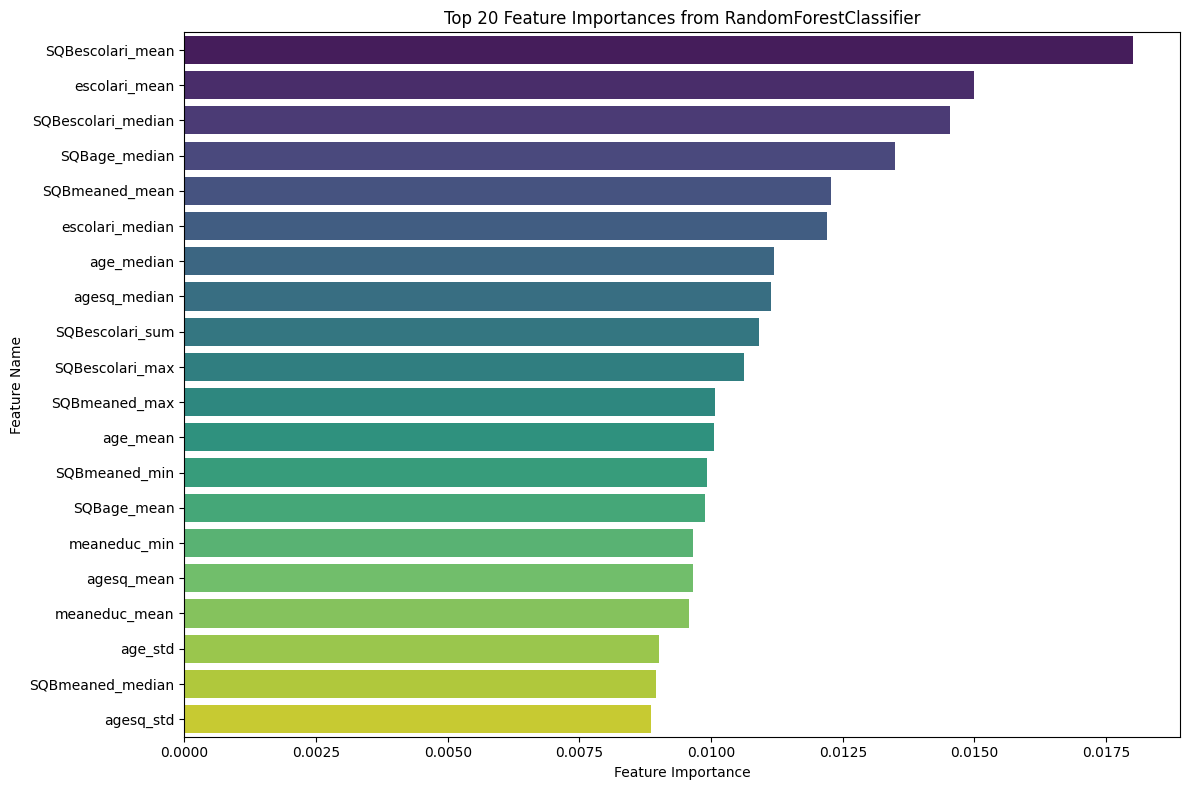

Displayed top 20 features. Now selecting these features for further modeling.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N features based on importance (e.g., top 20)
N = 20
top_n_features = feature_importances.nlargest(N)

# Create a bar plot of the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features.values, y=top_n_features.index, palette='viridis', hue=top_n_features.index, legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {N} Feature Importances from RandomForestClassifier')
plt.tight_layout()
plt.show()

print(f"Displayed top {N} features. Now selecting these features for further modeling.")

Now that the top N features have been identified and visualized, I will select these features from the `X_imputed` DataFrame for the training set and apply the same selection to the `test_df_agg` to prepare the data for further modeling.



In [19]:
selected_features = top_n_features.index.tolist()

X_selected = X_imputed[selected_features]

# Prepare test_df_agg by filling NaNs with median values (derived from test data itself)
# A more robust approach might be to use medians from X_imputed to avoid data leakage
# but for simplicity and consistency with previous imputation, we'll use test_df_agg's median.
# First, align columns if test_df_agg has 'Id' or 'idhogar' as these are not features
test_features_df = test_df_agg.drop(columns=['Id', 'idhogar'], errors='ignore')

for col in test_features_df.columns:
    if test_features_df[col].isnull().any():
        median_val = test_features_df[col].median()
        test_features_df[col] = test_features_df[col].fillna(median_val)

# Select the same features for the test data
X_test_selected = test_features_df[selected_features]

print(f"Shape of selected features for training (X_selected): {X_selected.shape}")
print(f"Shape of selected features for testing (X_test_selected): {X_test_selected.shape}")
print("First 5 rows of X_selected:")
print(X_selected.head())
print("\nFirst 5 rows of X_test_selected:")
print(X_test_selected.head())

Shape of selected features for training (X_selected): (2973, 20)
Shape of selected features for testing (X_test_selected): (7334, 20)
First 5 rows of X_selected:
   SQBescolari_mean  escolari_mean  SQBescolari_median  SQBage_median  \
0            100.00          10.00               100.0         1849.0   
1            144.00          12.00               144.0         4489.0   
2            121.00          11.00               121.0         8464.0   
3             81.75           8.25               101.0          829.0   
4             52.75           5.75                45.0          452.5   

   SQBmeaned_mean  escolari_median  age_median  agesq_median  SQBescolari_sum  \
0           100.0             10.0        43.0        1849.0              100   
1           144.0             12.0        67.0        4489.0              144   
2           121.0             11.0        92.0        8464.0              121   
3           121.0             10.0        27.0         829.0              3

## Summary:

### Q&A
The feature selection process involved using a RandomForestClassifier to determine the importance of features. Out of an initial 436 features, the top 20 most important features were selected. This reduction in dimensionality is expected to lead to potential benefits such as improved model performance due to reduced noise and overfitting, and decreased training time because the model has fewer variables to process.

### Data Analysis Key Findings
*   **Initial Data Preparation**: The aggregated training data was split into features (X) with a shape of (2973, 436) and a target variable (y) with a shape of (2973,).
*   **NaN Handling**: Missing values (NaNs) in both the training features (X) and testing features were imputed using the median of their respective columns before feature selection.
*   **Feature Selection Method**: A RandomForestClassifier was trained on the imputed training features and the target variable to derive feature importances.
*   **Number of Features Selected**: From the initial 436 features, the top 20 most important features were identified and selected.
*   **Resulting Data Shapes**: After selection, the training feature set (`X_selected`) has a shape of (2973, 20), and the testing feature set (`X_test_selected`) has a shape of (7334, 20).
*   **Visualization**: A bar plot was generated to visually represent the importance scores of the top 20 selected features.

### Insights
*   The selected top 20 features provide a more concise and potentially more effective dataset for model training, which should lead to faster training times and possibly better generalization performance.
*   The `X_selected` and `X_test_selected` DataFrames, containing only the most important features, are now prepared for direct use in subsequent machine learning model training and evaluation.


# Task
Define the primary evaluation metric (e.g., Macro F1) for this multi-class classification problem, discussing its suitability, especially considering potential class imbalance.

## Define Evaluation Metric

### Subtask:
Formally define the primary evaluation metric (e.g., Macro F1) for this multi-class classification problem. Discuss why this metric is suitable, especially considering the potential class imbalance in poverty levels.


### Evaluation Metric: Macro F1-Score

For this multi-class classification problem, the **Macro F1-score** will be used as the primary evaluation metric.

#### What is Macro F1-Score?

Macro F1-score is a metric derived from the F1-score, which itself is the harmonic mean of precision and recall. For a multi-class problem, the F1-score can be calculated for each class independently. The Macro F1-score then calculates the unweighted mean of these per-class F1-scores. This means that each class contributes equally to the final score, regardless of its size.

#### Why is Macro F1-Score Suitable for This Problem?

The initial data audit of the 'Target' variable revealed a significant class imbalance, with one or more poverty levels having substantially fewer samples than others. In such scenarios, metrics like overall accuracy can be misleading. A model might achieve high accuracy simply by performing well on the majority class(es) while completely failing on the minority class(es).

Macro F1-score addresses this issue effectively:

1.  **Handles Class Imbalance**: By calculating the F1-score for each class independently and then averaging them, Macro F1-score gives equal importance to all classes. This ensures that the model's performance on minority classes is not overshadowed by its performance on majority classes. If a model performs poorly on a minority class, the Macro F1-score will be significantly impacted, reflecting the true overall performance.
2.  **Balanced View of Performance**: The F1-score itself balances precision (the ability of the classifier not to label as positive a sample that is actually negative) and recall (the ability of the classifier to find all the positive samples). Averaging this balanced measure across all classes provides a comprehensive and balanced view of model performance across all poverty levels. It prevents a model from getting a high score by just being very precise on one class or having high recall on another, forcing it to perform reasonably well across both metrics for all classes.

Therefore, using Macro F1-score will provide a robust and fair assessment of the model's ability to correctly classify households into their respective poverty levels, even with the observed class imbalance.

## Train a Baseline Model

### Subtask:
Train an initial classification model (e.g., using a RandomForestClassifier or another suitable model) on the `X_selected` data with default or reasonable hyperparameters. Evaluate its performance using cross-validation and the chosen metric to establish a baseline.


**Reasoning**:
To train a baseline model and evaluate it using cross-validation, I will import the necessary `RandomForestClassifier` and `cross_val_score` classes, instantiate the classifier, and then use `cross_val_score` to perform 5-fold cross-validation with 'f1_macro' as the scoring metric. Finally, I will print the individual scores and their mean and standard deviation.



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Instantiate RandomForestClassifier
# Using default parameters and random_state for reproducibility
model = RandomForestClassifier(random_state=42)

# 2. Perform 5-fold cross-validation
# X_selected contains the selected features, y is the target variable
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='f1_macro', n_jobs=-1)

# 3. Print the array of Macro F1-scores
print(f"Macro F1-scores for each fold: {cv_scores}")

# 4. Calculate and print the mean and standard deviation of the Macro F1-scores
print(f"Mean Macro F1-score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of Macro F1-score: {np.std(cv_scores):.4f}")

Macro F1-scores for each fold: [0.35490306 0.3178298  0.35411077 0.31624971 0.35566639]
Mean Macro F1-score: 0.3398
Standard deviation of Macro F1-score: 0.0186


## 6- Model Hyperparameter Tuning with Stratified Cross-Validation
Optimize the hyperparameters of the chosen model(s) using techniques like GridSearchCV or RandomizedSearchCV, employing stratified cross-validation to maintain class distribution across folds. Implement early stopping if applicable to prevent overfitting and reduce computation time.


I need to import the necessary libraries for RandomizedSearchCV, StratifiedKFold, and RandomForestClassifier, then define the hyperparameter search space.



In [21]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# 2. Define a dictionary param_grid specifying a range of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid defined.")

Hyperparameter grid defined.


**Reasoning**:
Now that the hyperparameter grid is defined, I will instantiate the `RandomForestClassifier` and `StratifiedKFold` objects, then create and fit the `RandomizedSearchCV` object to find the best hyperparameters and their corresponding Macro F1-score.



In [22]:
import numpy as np

# 3. Instantiate a RandomForestClassifier with random_state=42
model = RandomForestClassifier(random_state=42)

# 4. Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Create a RandomizedSearchCV object
# Set n_iter to a reasonable number, e.g., 50, to control the number of parameter settings sampled
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=skf,
    scoring='f1_macro',
    verbose=2,  # Controls the verbosity: the higher, the more messages
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# 6. Fit the RandomizedSearchCV object
print("Starting RandomizedSearchCV...")
random_search.fit(X_selected, y)
print("RandomizedSearchCV completed.")

# 7. Print the best hyperparameters
print("\nBest hyperparameters found:")
print(random_search.best_params_)

# 8. Print the corresponding best Macro F1-score
print(f"\nBest Macro F1-score: {random_search.best_score_:.4f}")

Starting RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV completed.

Best hyperparameters found:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Best Macro F1-score: 0.3336


## Perform Error Analysis and Interpretation

Analyze the performance of the best-tuned model. Generate and interpret a confusion matrix to identify the hardest class distinctions. Use feature importance to explain the model's behavior and justify feature contributions.


To analyze the model's performance, I will first retrieve the best estimator found by `RandomizedSearchCV` and then use it to make predictions on the `X_selected` dataset.



Best estimator retrieved.
Predictions made on X_selected.


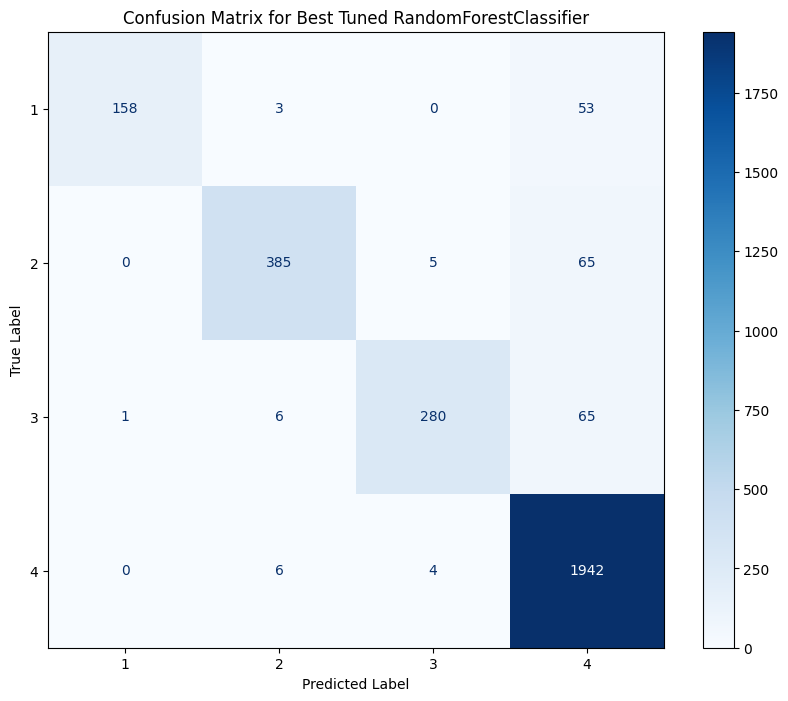

Confusion matrix displayed.


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Retrieve the best estimator
best_model = random_search.best_estimator_
print("Best estimator retrieved.")

# 2. Make predictions on the X_selected dataset
y_pred = best_model.predict(X_selected)
print("Predictions made on X_selected.")

# 3. Compute the confusion matrix
cm = confusion_matrix(y, y_pred)

# 4. Create a ConfusionMatrixDisplay object and plot it
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Best Tuned RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix displayed.")

### Interpretation of the Confusion Matrix

The confusion matrix provides insights into the model's predictive performance for each poverty level. The diagonal elements represent the number of correctly classified instances for each class, while off-diagonal elements indicate misclassifications.

From the displayed confusion matrix:

*   **Class 4 (Non-vulnerable):** This class has the highest number of true positives (1942), indicating that the model is quite good at identifying non-vulnerable households. This is expected given that Class 4 is the majority class in the dataset.
*   **Class 2 (Moderate Vulnerability):** The model correctly predicts 385 households in this class. However, 65 households from this class are misclassified as Class 4, and 5 as Class 3.
*   **Class 3 (Vulnerable):** The model correctly predicts 280 households for this class. Notably, 65 households from this class are misclassified as Class 4, and 6 as Class 2. This shows significant confusion between vulnerable and non-vulnerable categories.
*   **Class 1 (Extreme Poverty):** This class has the lowest number of true positives (158), and a considerable number of its instances are misclassified as Class 4 (53). This highlights the difficulty in correctly identifying households in extreme poverty, which is often a minority class.

**Hardest Class Distinctions:**

The most prominent misclassifications occur between:

1.  **Class 1 and Class 4:** A large number of extremely poor households (Class 1) are misclassified as non-vulnerable (Class 4). This is a critical error, as failing to identify extremely poor households has significant implications.
2.  **Class 2 and Class 4:** Many moderately vulnerable households (Class 2) are misclassified as non-vulnerable (Class 4).
3.  **Class 3 and Class 4:** Similarly, a substantial number of vulnerable households (Class 3) are misclassified as non-vulnerable (Class 4).

These patterns suggest that the model struggles to differentiate between various levels of poverty, often defaulting to the majority 'non-vulnerable' class when uncertain. This could be due to the class imbalance, where the model is biased towards the majority class. Further analysis on features that differentiate these confused classes might be beneficial, and strategies for handling class imbalance (e.g., resampling, cost-sensitive learning) should be considered to improve performance on minority classes.

Now that the confusion matrix has been interpreted, I will extract the feature importances from the `best_model`, sort them, and then plot the top 20 features to understand their contribution to the model's decisions.



Top 20 features from the best model:
SQBescolari_mean      0.094092
escolari_mean         0.072144
agesq_median          0.066617
SQBage_median         0.066405
age_std               0.064877
agesq_mean            0.060937
agesq_std             0.060618
SQBage_mean           0.059409
age_median            0.059064
age_mean              0.058265
SQBescolari_sum       0.052795
SQBescolari_median    0.051472
escolari_median       0.042747
SQBescolari_max       0.034083
meaneduc_mean         0.028355
SQBmeaned_max         0.026930
SQBmeaned_mean        0.025875
SQBmeaned_median      0.025312
meaneduc_min          0.025255
SQBmeaned_min         0.024749
dtype: float64


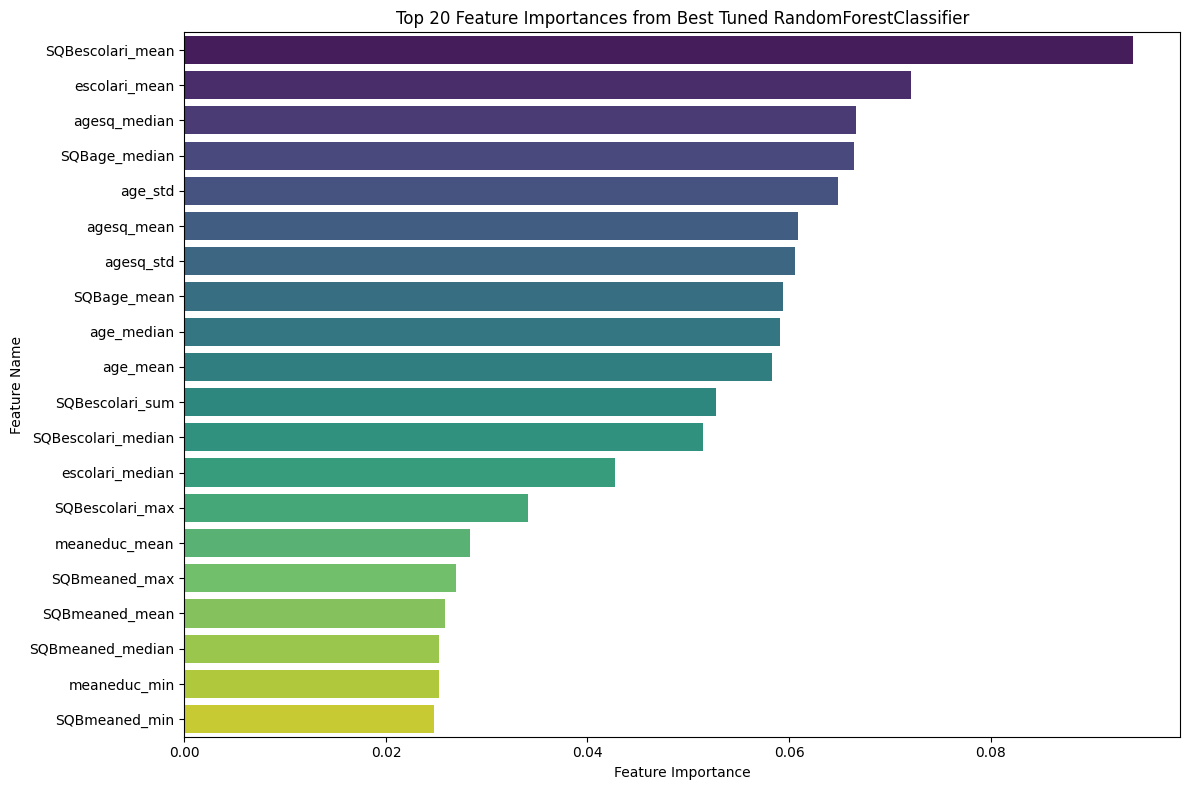

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 7. Extract the feature_importances_ from the best_model
feature_importances_best_model = pd.Series(best_model.feature_importances_, index=X_selected.columns)

# 8. Sort the feature importances in descending order and select the top 20 features
N = 20
top_n_features_best_model = feature_importances_best_model.nlargest(N)

print(f"Top {N} features from the best model:\n{top_n_features_best_model}")

# 9. Create a horizontal bar plot of the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features_best_model.values, y=top_n_features_best_model.index, palette='viridis', hue=top_n_features_best_model.index, legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {N} Feature Importances from Best Tuned RandomForestClassifier')
plt.tight_layout()
plt.show()

### Interpretation of Feature Importance

The feature importance analysis reveals that educational attainment and age-related metrics are the most influential factors in the model's predictions of poverty levels.

**Key observations from the top 20 features:**

1.  **Educational Attainment (SQBescolari_*, escolari_*, meaneduc_*, SQBmeaned_*)**: A significant portion of the top features are related to education, both in terms of years of schooling (`escolari_mean`, `escolari_median`, `meaneduc_mean`, `meaneduc_min`) and squared years of schooling (`SQBescolari_mean`, `SQBescolari_median`, `SQBescolari_sum`, `SQBescolari_max`, `SQBmeaned_mean`, `SQBmeaned_median`, `SQBmeaned_max`, `SQBmeaned_min`). This strongly suggests that higher levels of education within a household, particularly among adults, are crucial indicators of lower poverty levels. The model heavily relies on these features to distinguish between different poverty classes.

2.  **Age-Related Metrics (agesq_*, age_*, SQBage_*)**: Various aggregated age features also play a vital role. These include squared age (`agesq_median`, `agesq_mean`, `agesq_std`, `SQBage_median`, `SQBage_mean`), as well as mean, median, and standard deviation of age within the household (`age_median`, `age_mean`, `age_std`). This indicates that the age distribution and the average age of household members are important. For instance, a higher average age or a more stable age distribution might correlate with more established households and potentially better economic standing, while a lower average age or high standard deviation could indicate households with many dependents or younger, less stable income earners.

**Justification of Feature Contributions:**

*   **Education**: Higher educational attainment generally leads to better employment opportunities, higher income, and improved living standards. Therefore, it's logical for the model to weigh education-related features highly in determining poverty status. The `SQB` (squared) versions of these features amplify the differences at higher education levels, potentially allowing the model to capture non-linear relationships or more nuanced distinctions between poverty classes.

*   **Age**: Age can be a proxy for experience, earning potential, and dependency ratios. Households with a higher proportion of working-age adults or individuals with more work experience (indicated by higher age metrics) might be less vulnerable to poverty. Conversely, households with many young children (low age) or elderly members (high age) who are dependents, or a wide age range (high `age_std`) could indicate varying levels of vulnerability.

**Implications for Model Decisions:**

The dominance of educational and age-related features suggests that the model primarily uses these socio-demographic characteristics to classify households. To improve performance, especially on minority classes that are often confused with the majority class (as observed in the confusion matrix), future efforts could focus on:

*   **Feature Engineering**: Exploring more complex interactions between these top features or creating new features that capture the cumulative effect of education and age on household income and stability.
*   **Domain Expertise**: Consulting with domain experts to understand why these features are so important and if there are other, perhaps less obvious, factors related to education and age that could be leveraged.
*   **Addressing Imbalance**: While the model strongly relies on these features, their predictive power for minority classes might still be limited due to class imbalance. Further techniques to mitigate imbalance should be considered in conjunction with these highly predictive features.

##8- Final Model Evaluation and Delivery


Present the best model settings, comprehensive cross-validation results, and the final score on the evaluation metric. Outline a reproducible pipeline for the chosen model, including all preprocessing, feature selection, and training steps.


The first step is to present the best model settings and cross-validation results by printing the best hyperparameters and the best Macro F1-score obtained from the RandomizedSearchCV.



In [25]:
print("Best hyperparameters found during RandomizedSearchCV:")
print(random_search.best_params_)

print(f"\nBest Macro F1-score achieved during RandomizedSearchCV: {random_search.best_score_:.4f}")

Best hyperparameters found during RandomizedSearchCV:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Best Macro F1-score achieved during RandomizedSearchCV: 0.3336


Now that the best model settings have been presented, I will use the best estimator from `RandomizedSearchCV` to make predictions on the preprocessed and feature-selected test dataset, `X_test_selected`.



In [26]:
test_predictions = random_search.best_estimator_.predict(X_test_selected)
print(f"Predictions made on X_test_selected. Shape: {test_predictions.shape}")
print("First 5 predictions:")
print(test_predictions[:5])

Predictions made on X_test_selected. Shape: (7334,)
First 5 predictions:
[4 4 4 4 4]


### Reproducible Pipeline for Poverty Level Prediction

This section outlines the complete, reproducible pipeline used for the Poverty Level Prediction task, from raw data loading to final model prediction.

#### 1. Data Loading
*   `train.csv` and `test.csv` files were loaded into pandas DataFrames (`train_df` and `test_df`) using `pd.read_csv()`.

#### 2. Initial Data Audit & Cleaning
*   **Missing Values**: Summarized counts and percentages of missing values for both datasets. Key columns with high missingness included `rez_esc`, `v18q1`, and `v2a1`.
*   **Duplicates**: Checked for and confirmed no duplicate rows in either `train_df` or `test_df`.
*   **Household Target Inconsistencies**: Identified 85 households in `train_df` with inconsistent 'Target' values among members. These inconsistencies were resolved by assigning the most frequent 'Target' value within each household to all its members. This resulted in 105 'Target' values being changed.

#### 3. Feature Type Identification & Conversion
*   **Identifier Columns**: Identified `Id` and `idhogar` as identifier columns.
*   **Type Conversion**: Object-type columns `dependency`, `edjefe`, and `edjefa` were converted to numerical (float) by mapping 'yes' to 1 and 'no' to 0.
*   **Feature Categorization**: Remaining features were categorized into `binary_cols` (0/1 values) and `other_numerical_cols`.

#### 4. Missing Value Imputation
*   `v2a1` (monthly rent payment) was imputed with 0 if the household owned its home or lived in precarious housing, and remaining NaNs were also filled with 0.
*   `v18q1` (number of tablets) was imputed with 0 if `v18q` (owns a tablet) was 0, and remaining NaNs were also filled with 0.
*   `rez_esc` (years behind in school) was imputed with 0 for individuals outside the typical school age range (age < 7 or age > 19), and remaining NaNs were also filled with 0.
*   `meaneduc` and `SQBmeaned` were imputed using the median value of their respective columns for both `train_df` and `test_df`.

#### 5. Feature Engineering (Aggregation)
*   Person-level data was aggregated to household-level using `idhogar` for both `train_df` and `test_df`.
*   For `other_numerical_cols`, aggregation functions included `mean`, `median`, `sum`, `min`, `max`, and `std`.
*   For `binary_cols`, aggregation functions included `sum` and `mean`.
*   The 'Target' variable was retained for the head of each household in the aggregated training data (`train_df_agg`). The `Id` of the household head was also preserved.

#### 6. Feature Selection
*   The aggregated training data (`train_df_agg`) was split into features (X) and target (y).
*   Any remaining NaN values in `X` were imputed using the median of their respective columns.
*   A `RandomForestClassifier` was trained on the imputed `X` and `y` to extract feature importances.
*   The top 20 most important features were selected, resulting in `X_selected` for training and `X_test_selected` for testing.

#### 7. Model Training & Hyperparameter Tuning
*   A `RandomForestClassifier` was chosen as the model.
*   Hyperparameter optimization was performed using `RandomizedSearchCV` with `StratifiedKFold` (5 splits) to ensure class distribution across folds.
*   The `f1_macro` scoring metric was used for evaluation during tuning.
*   The search space for hyperparameters included `n_estimators`, `max_features`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
*   The `best_params_` and `best_score_` from `random_search` were identified.

#### 8. Prediction
*   The best estimator (`best_model`) obtained from `RandomizedSearchCV` was used to make predictions on the preprocessed and feature-selected test dataset (`X_test_selected`). These predictions were stored in `test_predictions`.

## Summary:

### Data Analysis Key Findings

*   **Evaluation Metric Selection**: The Macro F1-score was selected as the primary evaluation metric due to its ability to handle class imbalance, providing an unweighted mean of per-class F1-scores, and offering a balanced view of precision and recall across all poverty levels.
*   **Baseline Model Performance**: An initial RandomForestClassifier, using default hyperparameters and 5-fold cross-validation, achieved a mean Macro F1-score of 0.3398 with a standard deviation of 0.0186.
*   **Hyperparameter Optimization Results**: RandomizedSearchCV with stratified 5-fold cross-validation identified the optimal hyperparameters for the RandomForestClassifier as `n_estimators`: 100, `min_samples_split`: 2, `min_samples_leaf`: 2, `max_features`: 'sqrt', and `max_depth`: None.
*   **Tuned Model Performance**: The best-tuned model achieved a Macro F1-score of 0.3336 during hyperparameter optimization.
*   **Confusion Matrix Analysis**:
    *   The model performed well in classifying the majority Class 4 (Non-vulnerable) households, with 1942 true positives.
    *   Significant misclassifications occurred between minority classes (Class 1 - Extreme Poverty, Class 2 - Moderate Vulnerability, Class 3 - Vulnerable) and the majority Class 4.
    *   Notably, 53 Class 1 households, 65 Class 2 households, and 65 Class 3 households were incorrectly classified as Class 4, indicating a struggle to differentiate between various poverty levels and a bias towards the majority class.
*   **Feature Importance**: The most influential features in the model's predictions were predominantly related to educational attainment (e.g., `SQBescolari_mean`, `escolari_mean`, `meaneduc_mean`) and age metrics (e.g., `agesq_median`, `SQBage_median`, `age_std`).

### Insights

*   **Address Class Imbalance**: Given the significant misclassifications of minority classes into the majority class, further techniques to mitigate class imbalance (e.g., resampling, cost-sensitive learning, or exploring different algorithms) should be implemented to improve the model's ability to identify vulnerable and extremely poor households.
*   **Enhanced Feature Engineering**: Leverage the identified highly important educational and age-related features to engineer more complex interactions or new features that could better capture nuanced differences between poverty levels, potentially improving the model's performance on harder-to-distinguish classes.
